In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
%matplotlib inline

--------------

In [2]:
# import filtered business_id as dataframe from pickle
with open('data/yelp-dataset/df_business.pickle', 'rb') as fp:
    df_business_id = pickle.load(fp)
print(df_business_id.name)
df_business_id.shape

business_id


(38117,)

In [3]:
#readin review.json and filter it by cities
with open('data/yelp-dataset/yelp_academic_dataset_review.json') as fp:
    json_review = fp.readlines()
json_review[2]

'{"review_id":"LZp4UX5zK3e-c5ZGSeo3kA","user_id":"msQe1u7Z_XuqjGoqhB0J5g","business_id":"jtQARsP6P-LbkyjbO1qNGg","stars":1,"date":"2014-10-23","text":"Terrible. Dry corn bread. Rib tips were all fat and mushy and had no flavor. If you want bbq in this neighborhood go to john mulls roadkill grill. Trust me.","useful":3,"funny":1,"cool":1}\n'

In [4]:
list_ = []
for i_line in json_review:
    list_.append(json.loads(i_line))

print(len(list_))
df_review = pd.DataFrame(list_)
print('before fileter', df_review.shape)
print('no NaN, as show in isna():', df_review.isna().sum())
df_review = df_review[df_review['business_id'].isin(df_business_id)]
print('after filter', df_review.shape)
df_review.head()

5996996
before fileter (5996996, 9)
no NaN, as show in isna(): business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64
after filter (2287009, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [5]:
print(df_review.size)
df_review.info()

20583081
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287009 entries, 0 to 5996991
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 174.5+ MB


In [6]:
df_review.text.iloc[0][200:]

"lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say..."

In [7]:
with open('data/yelp-dataset/review_df.pickle','wb') as fp:
    pickle.dump(df_review,fp)

---------

# 分析 rating stars/cool/funny

first drop ['text']  for speed

In [8]:
df_rating = df_review.drop(labels=['text'],axis=1)
df_rating.head(3)

,business_id,cool,date,funny,review_id,stars,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,3,msQe1u7Z_XuqjGoqhB0J5g


In [9]:
df_rating.describe()

,cool,funny,stars,useful
count,2.287009e+06,2.287009e+06,2.287009e+06,2.287009e+06
mean,6.623887e-01,5.374430e-01,3.781735e+00,1.352551e+00
std,2.517899e+00,2.159522e+00,1.389171e+00,3.416554e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
max,3.110000e+02,3.940000e+02,5.000000e+00,3.130000e+02


AxesSubplot(0.547727,0.125;0.352273x0.343182)
AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)


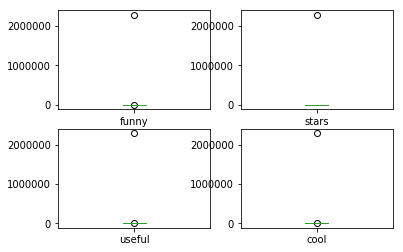

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(1,5):
    axis_ = axes[int(i/2)-1, i%2]
    print(axis_)
#     ax = axes[0,0]
#     ax
    df_rating.describe().iloc[:,i-1].plot(kind='box',ax=axis_)

groupby business id

In [23]:
grouped_avg_stars_rating = df_rating.groupby('business_id').mean()
# grouped_avg_stars_rating.rename('star',inplace=True)
grouped_avg_stars_rating.sort_values(by='stars', ascending=False, inplace=True)

In [12]:
grouped_avg_stars_rating['interval'] = pd.cut(grouped_avg_stars_rating['stars'],bins=5)
grouped_avg_stars_rating.head()

,cool,funny,stars,useful,interval
business_id,,,,,
JINLpOx5sB7eDtnAoy2UEg,0.062500,0.000000,5.0,0.250000,"(4.2, 5.0]"
HjaSykYIB3o5p3GMVPUasA,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
_Syl0eHkPuoYmBwz1e1Nsw,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
SORm6UKRlwHC6SmJZnbFEw,0.214286,0.142857,5.0,0.142857,"(4.2, 5.0]"
rnJP3FuuCBoo-wFxKPXYdQ,0.200000,1.000000,5.0,0.800000,"(4.2, 5.0]"


------------------

descriptive info on all business of Yelp

In [17]:
describe_rating = grouped_avg_stars_rating.describe()
describe_rating

,cool,funny,stars,useful
count,38117.000000,38117.000000,38117.000000,38117.000000
mean,0.613617,0.493615,3.772114,1.563563
std,0.959897,0.798628,0.885887,1.839058
min,0.000000,0.000000,1.000000,0.000000
25%,0.172414,0.100000,3.235294,0.666667
50%,0.400000,0.319820,3.860465,1.126984
75%,0.769231,0.620690,4.450980,1.875000
max,45.250000,34.500000,5.000000,62.500000


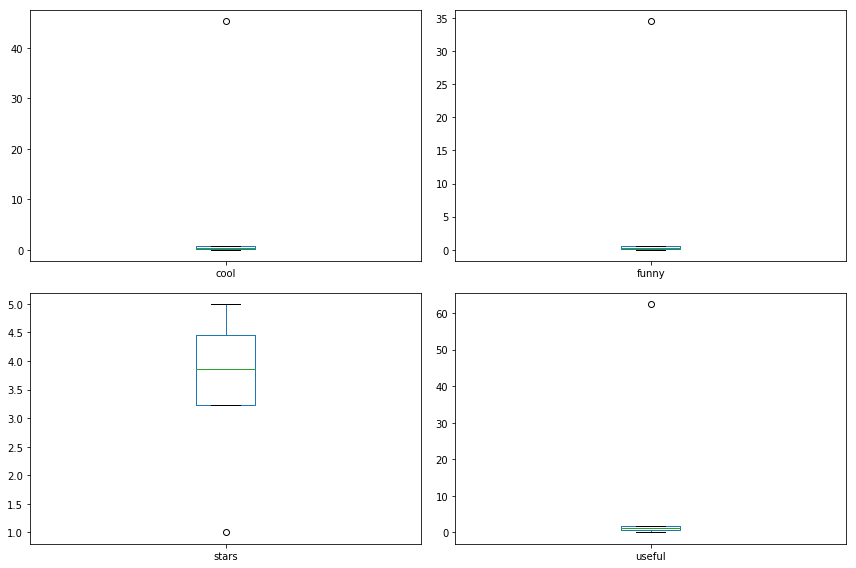

In [16]:
COL_NUM= 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,8))
for i in range(4):
    
    ax = axes[int(i/COL_NUM), i%COL_NUM]
#     pickup_zone = pickup_zone.sort_values(ascending=False)[:5] 
    describe_rating.loc['min':'max'].iloc[:,i].plot(kind='box', ax=ax)
#     ax.set_title(col)
    
plt.tight_layout() 

In [79]:
grouped_avg_stars_rating.head()

,cool,funny,stars,useful,interval
business_id,,,,,
nMrQcu3TpPQYoCjCrRNtQg,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
AuOhFEDbwwX8JPOsIwvxMA,0.357143,0.285714,5.0,1.714286,"(4.2, 5.0]"
URh2-qrfA3EcEHT5J67YnQ,0.400000,0.000000,5.0,1.400000,"(4.2, 5.0]"
Av7N6U8STpT8PAZ7GXAs1g,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
fdQFjjwfyCaJu4JFfXfUsg,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"


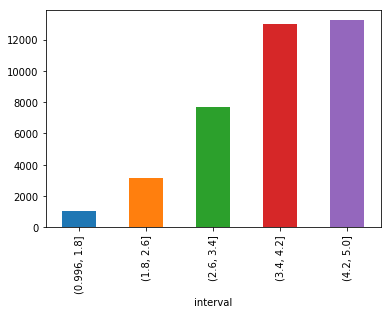

In [18]:
grouped_avg_stars_rating.groupby('interval').count()['stars'].plot(kind='bar')

In [19]:
grouped_stars = df_rating.groupby(['business_id','stars'])['user_id'].count()
grouped_stars.head()

business_id             stars
--9e1ONYQuAa-CB_Rrw7Tw  1         51
                        2        137
                        3        176
                        4        420
                        5        762
Name: user_id, dtype: int64